# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Saniyah Guay

## What does a Simple Linear Regression Model do?

#### It aims to find linear relationship to describe the correlation between a independent and dependent variable.

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
data = sns.load_dataset('diamonds')
df = pd.DataFrame(data)

In [44]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
- **What does it do?** Measures the linear correlation between two variables.
- **Range:** -1 to 1
- **Positive correlation:** r > 0
- **Negative correlation:** r < 0
- **No correlation:** r = 0

In [47]:
new_data = df.drop(['color','cut','clarity'], axis=1)
print(new_data)

       carat  depth  table  price     x     y     z
0       0.23   61.5   55.0    326  3.95  3.98  2.43
1       0.21   59.8   61.0    326  3.89  3.84  2.31
2       0.23   56.9   65.0    327  4.05  4.07  2.31
3       0.29   62.4   58.0    334  4.20  4.23  2.63
4       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 7 columns]


In [49]:
new_data.corr().head()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772


<Axes: >

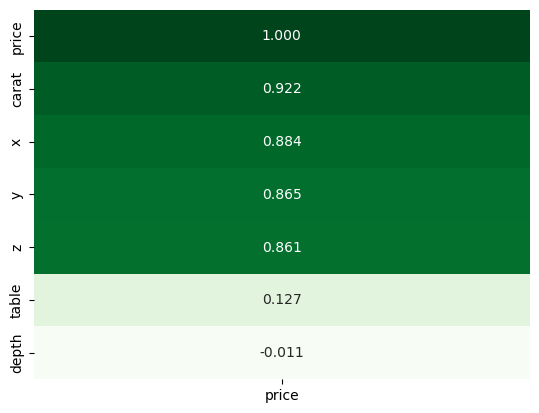

In [51]:
sns.heatmap(data=new_data.corr()[['price']].sort_values(
    by='price', ascending=False), annot=True,
cmap='Greens',
    cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Identify the strongest correlation.
2. Split data into training and testing sets.
3. Train the regression model on the training data.
4. Evaluate the model on the test data.

In [58]:
X = data.carat.values.reshape(-1, 1)
y = data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
model.score(X_test, y_test)

0.8504107786474794

In [64]:
y_pred = model.predict(X_test)
y_pred[:5]

array([9540.64191438, 1940.07543252, 3180.98424589, 2327.8594367 ,
       4421.89305925])

In [66]:
predicted_df = pd.DataFrame({'predicted_price': y_pred})
predicted_df.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [68]:
results = pd.concat([pd.DataFrame(X_test, columns=['carat']), 
                     pd.DataFrame(y_test).reset_index(drop=True), 
                     predicted_df], axis=1)

results.head()

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [70]:
melted = results.melt(id_vars='carat', 
                      value_vars=['price', 'predicted_price'], 
                      var_name='Type', 
                      value_name='Value')
melted.head()

,carat,Type,Value
0,1.52,price,8674.0
1,0.54,price,1637.0
2,0.70,price,2657.0
3,0.59,price,1838.0
4,0.86,price,2980.0


In [ ]:
sns.lineplot(data=melted, x='carat', y='Value', hue='Type', ci=None)
plt.title("Predicted vs Actual Prices")
plt.show()

## Regression Line Equation is y = mx + b, where...
- y is the dependent variable
- m is the slope of the line
- x is the independent variable
- b is the Y-intercept

In [81]:
X = data.carat.values.reshape(-1, 1)
y = data.price

In [83]:
lr = LinearRegression()
predicted = lr.fit(X, y)

In [87]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800453865


In [89]:
print(f'Regression line equation is y = {m[0]}x + {b}')

Regression line equation is y = 7756.425617968414x + -2256.3605800453865


In [91]:
carat = 0.70
predicted_price_70 = m[0] * carat + b
print(f"The predicted price for a 0.70 carat diamond is ${predicted_price_70:.2f}")

The predicted price for a 0.70 carat diamond is $3173.14


In [93]:
carat = 0.54
predicted_price_54 = m[0] * carat + b
print(f"The predicted price for a 0.54 carat diamond is ${predicted_price_54:.2f}")

The predicted price for a 0.54 carat diamond is $1932.11


In [95]:
print("Yes, the estimates are close to the predicted prices obtained in Step 18. Small differences might occur due to rounding.")

Yes, the estimates are close to the predicted prices obtained in Step 18. Small differences might occur due to rounding.
